# 블로그 업로드 완료

# 선생님 말씀

* 최종 프로젝트는 아래와 같이 진행되면 좋겠다.  

1. 데이터 수집, 전처리  
2. 모델링, python 서버 만들어보기  
3. spring web 서버 (UI) - 버전 1 완성, test 및 평가 -> 추가 설계 문서 도출 (미니 릴리즈 발표 - 전체 집합)  
4. 
5. 
6. 최종 발표 준비 (동영상 작업)  

* 프로젝트 드롭은 없다.  
* 현장에서 프로젝트 드롭은 절대 있으면 안된다.  
* 피벗팅 등등 고려하지 말고 끝가지 해나가야 한다.  

# flask와 Django

* 장고는 MVC 로 서비스를 짜기 쉽다.  
* 하지만 플라스크는 그런 거 없다. 섞어서 쓴다.  
* MVC 패턴을 사용하는 건 java에서 하는 게 맞긴 하다. 파이썬 서버를 쓸 필요가 없다.  
* MVC는 뷰, 프론트가 필요할 때 사용하게 된다.  

* 그러면 왜 장고를 사용하는가?  
* 라는 질문에 다다를 수 있다...

In [1]:
# !pip install flask

# Flask

In [1]:
from flask import Flask

In [3]:
app = Flask(__name__)

@app.route("/")
def anyname():
    return "안녕하세요 아무개입니다."

@app.route('/app1')
def app1():
    return 'hello, its app1'
    
@app.route('/app2')
def app2():
    return 'hello, its app2'

# app.run(host = '192.168.10.25', port = 5000)
app.run(host = 'localhost', port = 5002)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://localhost:5002
Press CTRL+C to quit
127.0.0.1 - - [03/Feb/2023 13:30:24] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Feb/2023 13:30:24] "GET /favicon.ico HTTP/1.1" 404 -


## 설명  
  
* Flask 는 페이지를 app 이라고 부른다.  
* 위에서 보는 만큼 플라스크는 작성이 매우 간단하다.  
* 그러나 구현할 수 있는 ui 가 많지 않고  
* 사이트가 복잡해지면 복잡해질수록 관리가 어렵다는 단점이 있다.  

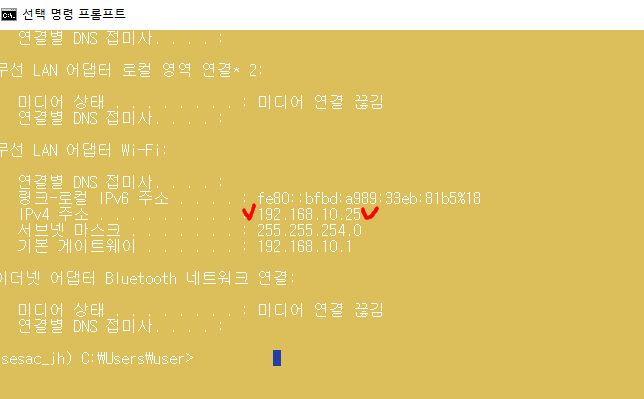

내 컴퓨터 호스트는 IPv4 주소가 IP주소임을 생각하면 된다.  

## 데코레이터

at 특수문자 (@) 로 쓰여진 것이 데코레이터

# 피클로 불러온 모델 사이트에 띄워보기

In [1]:
import pickle
with open('pickled_model_iris.bin', 'rb') as f:
    dt_model_loaded = pickle.load(f)
from flask import Flask

app = Flask(__name__)

@app.route("/")
def anyname():
    return "안녕하세요 박종혁입니다."

@app.route('/ML')
def app1():
    label_names = ['setosa', 'versicolor', 'virginica']
    
    data = [[6.9, 3.2, 5.7, 2.3]]
    ind = dt_model_loaded.predict(data)
    
    if (6.0 < data[0] <7.0) and (2.0 < data[3] < 3.0):
        ind = 2
    
    return f'이 꽃은 {label_names[int(ind)]} 입니다.'
    
@app.route('/app2')
def app2():
    return 'hello, its app2'

@app.route('/service')
def service():
    return '서비스 페이지입니다'
    

app.run(host = 'localhost', port = 5002)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://localhost:5002
Press CTRL+C to quit
127.0.0.1 - - [03/Feb/2023 13:32:28] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Feb/2023 13:32:33] "GET /ML HTTP/1.1" 200 -
127.0.0.1 - - [03/Feb/2023 13:42:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Feb/2023 13:42:30] "GET /MLtest HTTP/1.1" 404 -
127.0.0.1 - - [03/Feb/2023 13:42:59] "GET /ML HTTP/1.1" 200 -


# Flask에서 HTML 코드 사용

In [1]:
from flask import Flask

app = Flask(__name__)    
mycount = 0

@app.route('/')
def anyname():
    global mycount
    mycount += 1
    return f'''
    <html>
    <head><title> 아무개입니다. </title></head>
    <body>
    <p>안녕하세요. 아무개입니다.</p>
    <p>{mycount}회 방문입니다.</p>
    </body>
    </html>
    '''

@app.route('/input')
def app_input():
    page = build_input_page()
    return page


app.run(host = 'localhost', port = 5002)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://localhost:5002
Press CTRL+C to quit
127.0.0.1 - - [06/Feb/2023 00:33:04] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2023 00:33:21] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2023 00:33:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2023 00:33:24] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2023 00:33:25] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2023 00:33:26] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2023 00:33:28] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2023 00:33:29] "GET / HTTP/1.1" 200 -


In [2]:
# 프론트엔드 : html 부
# 백엔드 부 : 위의 코드 같이 서버, 그리고 모델 부

# 여러 페이지 만들어보기

In [1]:
from flask import Flask

app = Flask(__name__)    
mycount = 0

def build_input_page(my_count):
    page = f'''
    <html>
    <body>
    <p>안녕하세요. 아무개입니다.</p>
    <p>{mycount}회 방문입니다.</p>
    </body>
    </html>
    '''
    return page

@app.route('/input')
def app_input():
    global mycount
    mycount += 1
    page = build_input_page(mycount)
    return page

@app.route('/')
def root():
    return'''
    <html>
    <body>
    <a href='/input'> 이 곳을 누르면 방문 횟수로 count 됩니다. </a>
    </body>
    </html>
    '''

app.run(host = 'localhost', port = 5002)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://localhost:5002
Press CTRL+C to quit
127.0.0.1 - - [06/Feb/2023 00:41:34] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2023 00:41:51] "GET /input HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2023 00:41:56] "GET /input HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2023 00:41:59] "GET /input HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2023 00:42:01] "GET /input HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2023 00:42:04] "GET /input HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2023 00:42:08] "GET /input HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2023 00:42:09] "GET /input HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2023 00:42:10] "GET /input HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2023 00:42:12] "GET /input HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2023 00:42:13] "GET /input HTTP/1.1" 200 -


# 상호작용 페이지 만들어보기

In [ ]:
from flask import Flask
from flask import request
    # 수신 결과를 받는 모듈 flask.request

app = Flask(__name__)

def build_input_page():
    page = f'''
    <html>
    <body>
    꽃 측정원 님 안녕하세요. <br>
    지금 입고된 꽃의 치수를 cm 단위로 입력해 주세요. <br>
    저희 [나만돈벌어tm] 회사의 머신러닝 분류기가 꽃의 종류를 판단해 줍니다. <br>
    그러면 그 결과에 맞춰 창고에 넣어 주세요. <br>
    
    <form action='http://localhost:5002/result' method='get'>
    sepal_length : <input type='text' name='sepal_length'></input>cm<br>
    sepal_width : <input type='text' name='sepal_width'></input>cm<br>
    petal_length : <input type='text' name='petal_length'></input>cm<br>
    petal_width : <input type='text' name='petal_width'></input>cm<br>
    <input type='submit'></input><br>
    </form>
    
    </body>
    </html>
    '''
    return page


def build_result_page():
    
    import tensorflow as tf
    import sklearn
    from sklearn.tree import DecisionTreeClassifier
    import pickle
    
    sepal_length = request.args.get('sepal_length')
    sepal_width = request.args.get('sepal_width')
    petal_length = request.args.get('petal_length')
    petal_width = request.args.get('petal_width')
    
    sepal_length = float(sepal_length)
    sepal_width = float(sepal_width)
    petal_length = float(petal_length)
    petal_width = float(petal_width)
    
    with open('pickled_model_iris.bin', 'rb') as f:
        dt_model_loaded = pickle.load(f)
    
    
    multiple = (int(sepal_length) * int(sepal_width) * int(petal_length) * int(petal_width))
    label_names = ['setosa', 'versicolor', 'virginica']
    result = dt_model_loaded.predict([[sepal_length, sepal_width, petal_length, petal_width]])
    result_class = label_names[int(result)]
    
    page = f'''
    수신 내용이 맞는지 확인해주세요 <br>
    * sepal_length : {sepal_length} <br>
    * sepal_width : {sepal_width} <br>
    * petal_length : {petal_length} <br>
    * petal_width : {petal_width} <br>

    모든 값 곱하기 : {multiple}<br>
    꽃 분류 : {result_class}
    '''
    return page

def build_home_page():
    page = '''
    <html>
    <body>
    
    <h1> Iris 분류기 </h1>
    <p> Iris 분류 시스템 입니다. </p>
    <a href = 'http://localhost:5002/input'> 입력 페이지로 이동합니다.</a>
    
    </body>
    </html>
    '''
    return page

@app.route('/')
def home_page():
    page = build_home_page()
    return page


@app.route('/input')
def app_input():
    page = build_input_page()
    return page

@app.route('/result', methods=['POST', 'GET'])
def app_result():
    page = build_result_page()
    return page


app.run(host = 'localhost', port = 5002)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://localhost:5002
Press CTRL+C to quit
127.0.0.1 - - [03/Feb/2023 15:54:56] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [03/Feb/2023 15:54:58] "GET /input HTTP/1.1" 200 -
127.0.0.1 - - [03/Feb/2023 15:55:02] "GET /result?sepal_length=1&sepal_width=2&petal_length=3&petal_width=4 HTTP/1.1" 200 -


# 백엔드와 프론트엔드의 분리

* 파이썬 프레임워크에서는 "템플릿"이라는 프론트엔드 코드를 외부에 빼놓기도 한다.  
* 이는 뷰와 컨트롤의 분리를 위함이다.  

* 템플릿은 html과 같은 뷰를 만들 수 있는 파일이면 된다.  
* 템플릿들은 코드가 존재하는 폴더의 "templates" 폴더 안에 위치하면 된다.  

## render_template를 이용한 뷰 - 컨트롤 분리
import render_template

플라스크에서 템플릿을 이용하기 위해서는  
render_template 모듈을 사용해야 한다.  

특정 페이지를 def 한 뒤, return 값에  
render_template('템플릿파일명') 을 지정해주면  
해당 템플릿이 보이게 된다.  

In [1]:
from flask import Flask
from flask import render_template

app = Flask(__name__)

@app.route('/')
def home_page():
    return render_template("flask_index.html")

app.run(host = 'localhost', port = 5002)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://localhost:5002
Press CTRL+C to quit
127.0.0.1 - - [06/Feb/2023 01:50:12] "GET / HTTP/1.1" 200 -


## 동적 변수 할당 

뷰 - 컨트롤 분리 시,  
뷰에 컨트롤러부터 받은 동적인 변수를 나타내줄 수도 있다.  

뷰에서는 중괄호 두 개 사이 변수명을 적어주는 방식으로 표현해줄 수 있고,  
{{var1}} {{var2}}

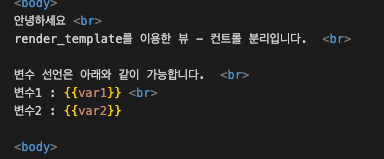  

컨트롤러부에서는 return에 들어가는 render_template의 파라미터 값으로  
변수를 지정해주면 된다.  
render_template('뷰 파일 명', var1 = 변수값1, var2 = 변수값2 ...)

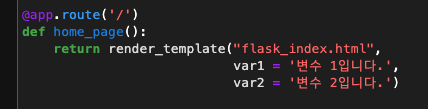

플라스크 뿐 아니라, 장고에서도 이와 같은 형식으로 동적 변수를 사용할 수가 있다.  

In [1]:
from flask import Flask
from flask import request
from flask import render_template
    # 수신 결과를 받는 모듈 flask.request

app = Flask(__name__)

@app.route('/')
def home_page():
    page = render_template("flask_index.html",
                           var1 = '변수 1입니다.',
                           var2 = '변수 2입니다.')
    return page

app.run(host = 'localhost', port = 5002)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://localhost:5002
Press CTRL+C to quit
127.0.0.1 - - [06/Feb/2023 01:55:13] "GET / HTTP/1.1" 200 -


## 플라스크 서버에서 css 사용하기

플라스크 서버에서는 CSS 파일을 static이라는 폴더 내에 위치시킨다.  

뷰단에서 css를 이용하는 방법은 아래와 같이 link href를 이용하게 된다.  

(1) 뷰단에서 직접 스타일 지정  
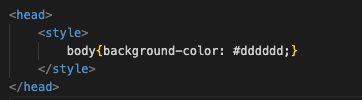

(2) css파일을 불러오기 (뷰단)  
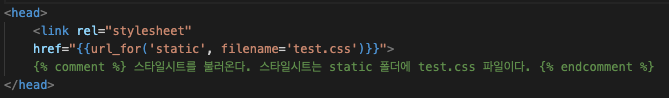

CSS 파일을 이용하기 위해서는 뷰단에서  
`<link rel=~~~~  href='{{url_for=~~~~}}'>`  
를 사용한다.

static 에 들어가는 소스들은 아래와 같다.  

* CSS  
* JS 파일들  
* 그림  
* 소리  
* 등 멀티미디어 파일  

* 하지만 이러한 번거로운 작성법이 있기 때문에  
* 플라스크로 제대로 된 서버를 구축하는 것은 추천하지 않는다.  
* 파이썬은 백엔드에 최적화된 코드이며,  
* 자바에 비해 버틸 수 있는 동시접속자 수가 엄청 적다.  

* 그러므로, 불특정다수를 대상으로 하는 때에는 자바 서버가 어울리며  
* 반대로, 스마트팩토리 등 관리자 몇 명만을 위한 서버(프레임워크)는 플라스크로도 충분할 수 있다.  
(굳이 자바서버로 할 필요가 없음)  

더불어 알아야 하는 것이..  
플라스크 서버는 보안 기능이 없다.  

따라서 대외적으로 제공하는 서비스에는 어울리지 않다.  
폐쇄망에서 사용할 경우는 괜찮겠지만.  

애초에 파이썬 자체가 쉽게쉽게 쓰자 에 초점이 맞춰져있기 때문에  
파이썬 진영에서도 굳이 이러한 보안 기능 들에 관심이 없다.  
그러므로 자바는 꼭 할 줄 알아야만 한다.  

In [1]:
from flask import Flask
from flask import request
from flask import render_template
    # 수신 결과를 받는 모듈 flask.request

app = Flask(__name__)

@app.route('/')
def home_page():
    page = render_template("flask_index.html",
                           var1 = '변수 1입니다.',
                           var2 = '변수 2입니다.')
    return page

app.run(host = 'localhost', port = 5002)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://localhost:5002
Press CTRL+C to quit
127.0.0.1 - - [06/Feb/2023 00:00:37] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Feb/2023 00:00:37] "GET /static/test.css HTTP/1.1" 200 -


html 코드
```
<html>

<head>
    <link rel="stylesheet"
    href="{{url_for('static', filename='test.css')}}">
    스타일시트를 불러온다. 스타일시트는 static 폴더에 test.css 파일이다.
</head>

<body>
안녕하세요 <br>
render_template를 이용한 뷰 - 컨트롤 분리입니다.  <br>

변수 선언은 아래와 같이 가능합니다.  <br>
변수1 : {{var1}} <br>
변수2 : {{var2}}

<body>

</html>
```